In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("flipkart.csv")
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [3]:
df.shape

(2304, 4)

In [4]:
df.isna().sum()

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 0', 'Product_name'],inplace=True)
df.head()

,Review,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence...,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product 👌🏻😘,5
4,"Light weight laptop with new amazing features,...",5


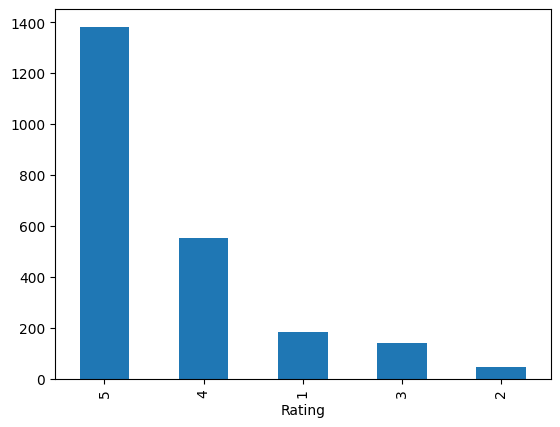

<Figure size 700x500 with 0 Axes>

In [6]:
df['Rating'].value_counts().plot(kind='bar')
fig = plt.figure(figsize=(7,5))

In [7]:
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

[nltk_data] Downloading package stopwords to C:\Users\BRATAJIT
[nltk_data]     DAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['cleanedReviews'] = df['Review'].apply(lambda x: preprocessing(x))
df.head()

,Review,Rating,cleanedReviews
0,Best under 60k Great performanceI got it for a...,5,best 60k great performancei got around 58500ba...
1,Good perfomence...,5,good perfom
2,Great performance but usually it has also that...,5,great perform usual also game laptop issu batt...
3,My wife is so happy and best product 👌🏻😘,5,wife happi best product
4,"Light weight laptop with new amazing features,...",5,light weight laptop new amaz featur batteri li...


In [9]:
def getAnalysis(rating):
    if rating<3:
        return 'Negative'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Rating'].apply(getAnalysis)

df

,Review,Rating,cleanedReviews,Analysis
0,Best under 60k Great performanceI got it for a...,5,best 60k great performancei got around 58500ba...,Positive
1,Good perfomence...,5,good perfom,Positive
2,Great performance but usually it has also that...,5,great perform usual also game laptop issu batt...,Positive
3,My wife is so happy and best product 👌🏻😘,5,wife happi best product,Positive
4,"Light weight laptop with new amazing features,...",5,light weight laptop new amaz featur batteri li...,Positive
...,...,...,...,...
2299,"Great display, accurate colours at this price ...",5,great display accur colour price rang,Positive
2300,Superb monitor first brought 1 used for 2 mont...,5,superb monitor first brought 1 use 2 month bou...,Positive
2301,Awesome,5,awesom,Positive
2302,Only one issue with adapter,5,one issu adapt,Positive


In [10]:
df['Analysis'].value_counts()

Analysis
Positive    1934
Negative     230
Neutral      140
Name: count, dtype: int64

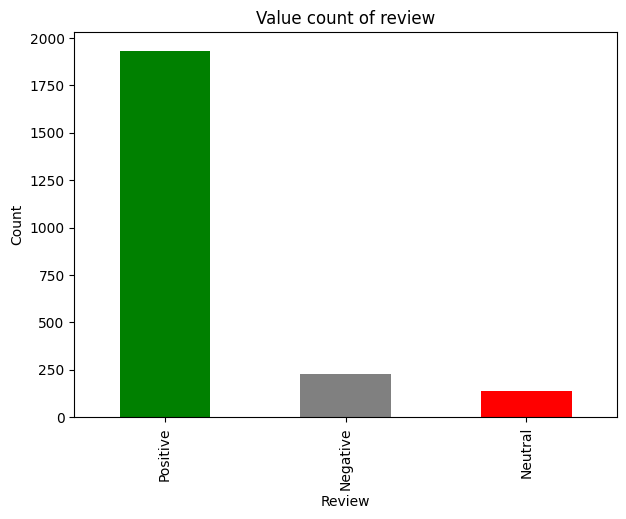

In [11]:
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of review')
plt.ylabel('Count')
plt.xlabel('Review')
plt.grid(False)
plt.show()

In [12]:
def create_wordcloud(text):    
    allWords = ' '.join([x for x in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(10,5))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()


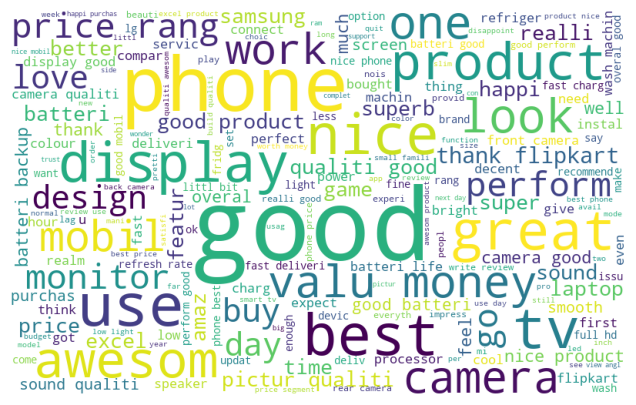

In [13]:
#wordcloud for positive reviews
posReviews = df.loc[df['Analysis']=='Positive', 'cleanedReviews']
create_wordcloud(posReviews)

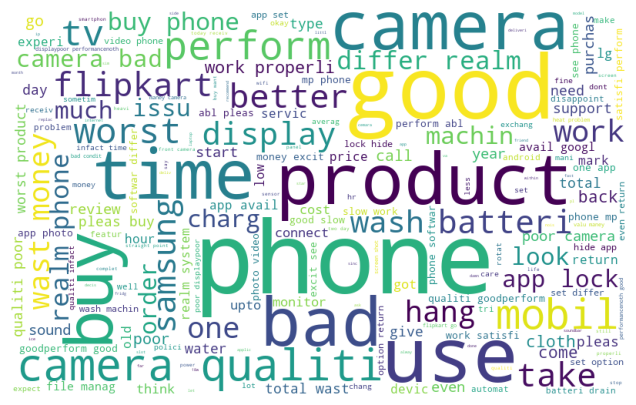

In [14]:
#wordcloud for negative reviews
negReviews = df.loc[df['Analysis']=='Negative', 'cleanedReviews']
create_wordcloud(negReviews)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Analysis']=le.fit_transform(df['Analysis'])
df.head()

,Review,Rating,cleanedReviews,Analysis
0,Best under 60k Great performanceI got it for a...,5,best 60k great performancei got around 58500ba...,2
1,Good perfomence...,5,good perfom,2
2,Great performance but usually it has also that...,5,great perform usual also game laptop issu batt...,2
3,My wife is so happy and best product 👌🏻😘,5,wife happi best product,2
4,"Light weight laptop with new amazing features,...",5,light weight laptop new amaz featur batteri li...,2


In [16]:
df['Analysis'].value_counts()

Analysis
2    1934
0     230
1     140
Name: count, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)

X=tfidf.fit_transform(df['cleanedReviews'])
y=df['Analysis']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
lr_pred=lr.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,lr_pred))

Accuracy: 0.9088937093275488


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
gb_pred=gb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,gb_pred))

Accuracy: 0.93058568329718


In [26]:
import pickle
pickle.dump(gb,open('gb.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [92]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  
    comment_vector = tfidf.transform(comment_list)
    prediction = gb.predict(comment_vector)[0]
    return prediction

In [93]:
prediction=prediction('very good product')

In [94]:
if prediction == 2:
    print("positive comment")
elif prediction == 0:
    print("negative comment")
else:
    print("neutral comment")

positive comment


In [100]:
print(df['cleanedReviews'][101])
print(df['Analysis'][202])

amaz laptop prize segment prize get type specif aspect like 256gb ssd drive fhd display allround king processor unit everyth fine use laptop till 8day ago think right option prop 1 fhd display one good ip lcd display good resolut capacity2 ssd maximum boot time taken approxim 4second 6 second3 ryzen 3 3340u round exc
1
